First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Missing values in the dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Dataset summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3469 - val_loss: 0.4249
Epoch 2/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3975 - val_loss: 0.3897
Epoch 3/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3689 - val_loss: 0.3713
Epoch 4/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3456 - val_loss: 0.3584
Epoch 5/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3484 - val_loss: 0.3614
Epoch 6/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3238 - val_loss: 0.3250
Epoch 7/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3049 - val_loss: 0.3339
Epoch 8/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3142 - val_loss: 0.3280
Epoch 9/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3052 - val_loss: 0.3113
Epoch 10/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2979 - val_loss: 0.3109
Epoch 11/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3017 - val_loss: 0.2992
Epoch 12/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0

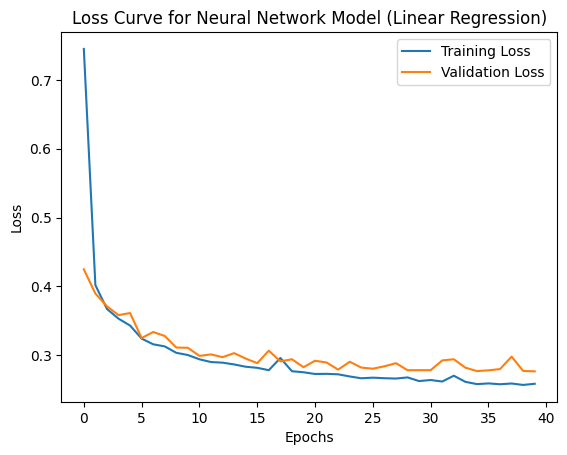

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Neural Network Predicted Price (Linear Regression using DNN): $4.3668


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.datasets import fetch_california_housing

# Fetch dataset
california = fetch_california_housing()

# Convert to Pandas DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target  # Adding target column (house price)

# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Summary statistics
print("\nDataset summary statistics:")
print(data.describe())

# Define features (X) and target variable (y)
X = data.drop(columns=['PRICE'])  # Independent variables
y = data['PRICE']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------
# Feature Scaling (Standardization)
# --------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------
# Deep Neural Network for Linear Regression (DNN)
# --------------------------------

# Import Keras modules
from keras.models import Sequential
from keras.layers import Dense

# Create the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 64 neurons, ReLU
    Dense(32, activation='relu'),  # 32 neurons, ReLU
    Dense(1)  # Output layer (Linear output for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use MSE for regression

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model on test data
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"\nNeural Network Test Loss (MSE): {test_loss:.4f}")

# --------------------------------
# Calculate MAE (Mean Absolute Error)
# --------------------------------

# Predict using the model on test data
y_pred_nn = model.predict(X_test_scaled)

# Calculate MAE for Neural Network (Linear Regression Model)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f"Neural Network MAE (Linear Regression using DNN): {mae_nn:.4f}")

# --------------------------------
# Plot Training Loss vs Validation Loss
# --------------------------------

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve for Neural Network Model (Linear Regression)')
plt.show()

# --------------------------------
# Prediction for New Data (Test the Model)
# --------------------------------

# Sample input (8 features instead of 13)
new_data = np.array([[8.3252, 41.0, 6.9841, 1.023, 322.0, 2.5556, 37.88, -122.23]])  # Adjust values as needed

# Convert new_data to a DataFrame with the same column names as X_train
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)

# Scale the input data using the same scaler that was fit on the training data
new_data_scaled = scaler.transform(new_data_df)

# Predict using the Neural Network (DNN)
nn_prediction = model.predict(new_data_scaled)
print(f"Neural Network Predicted Price (Linear Regression using DNN): ${nn_prediction[0][0]:.4f}")



In [8]:
# This code now includes both a linear regression model and a neural network model that behaves similarly to linear regression, and it compares both approaches for predicting house prices from the California housing dataset.
# The neural network model will still technically be a neural network but will perform in a linear fashion due to its simplified structure.
# Neural Network Behavior:
# While the hidden layers use ReLU activations, the neural network still has a linear output layer. This configuration allows the model to capture some non-linearity in the data, which might be beneficial over traditional linear regression.
# However, the overall structure is still well-suited for regression tasks, similar to linear regression but with a slightly more flexible model due to the hidden layers.

In [ ]:
# Feature	Why it's correct
# Output type	Predicts a continuous value (house price) — regression ✅
# Final layer	Only one neuron without activation (default linear activation) ✅
# Loss function	Mean Squared Error (MSE) — standard for regression tasks ✅
# Deep Neural Network	Multiple hidden layers (Dense layers with ReLU) — so it's deep ✅
# No Softmax / Sigmoid	Output is not probability, it's a real number — needed for regression ✅
# Data	California housing — continuous prices — regression dataset ✅

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Missing values in the dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Dataset summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.3958 - val_loss: 0.4522
Epoch 2/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4315 - val_loss: 0.4455
Epoch 3/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3815 - val_loss: 0.3840
Epoch 4/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3610 - val_loss: 0.3516
Epoch 5/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3504 - val_loss: 0.3492
Epoch 6/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3290 - val_loss: 0.3476
Epoch 7/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3265 - val_loss: 0.3228
Epoch 8/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3047 - val_loss: 0.3167
Epoch 9/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3113 - val_loss: 0.3153
Epoch 10/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2939 - val_loss: 0.3196
Epoch 11/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2998 - val_loss: 0.3129
Epoch 12/40
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

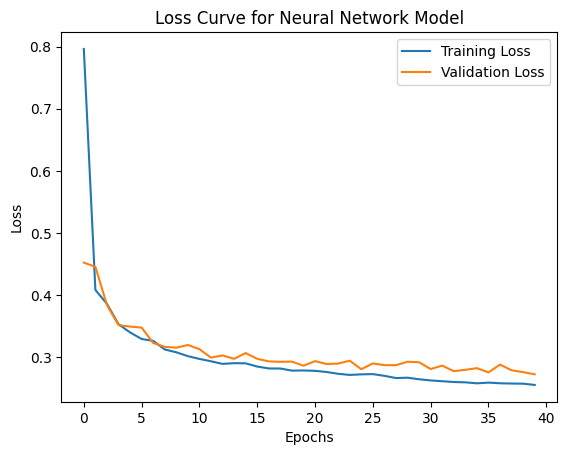

Linear Regression Predicted Price: $0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Neural Network Predicted Price: $3.8522


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Fetch dataset
california = fetch_california_housing()

# Convert to Pandas DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target  # Adding target column (house price)

# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Summary statistics
print("\nDataset summary statistics:")
print(data.describe())

# Define features (X) and target variable (y)
X = data.drop(columns=['PRICE'])  # Independent variables
y = data['PRICE']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------
# Linear Regression Model
# --------------------------------

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_lr = lr_model.predict(X_test)

# Calculate RMSE for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"\nLinear Regression RMSE: {rmse_lr:.4f}")

# --------------------------------
# Feature Scaling (Standardization)
# --------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------
# Deep Learning Model (Neural Network)
# --------------------------------

# Import Keras modules
from keras.models import Sequential
from keras.layers import Dense

# Create the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 64 neurons, ReLU
    Dense(32, activation='relu'),  # 32 neurons, ReLU
    Dense(1)  # Output layer (Linear activation)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"\nNeural Network Test Loss: {test_loss:.4f}")

# --------------------------------
# Plot Training Loss vs Validation Loss
# --------------------------------

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve for Neural Network Model')
plt.show()

# --------------------------------
# Prediction for New Data
# --------------------------------

# Sample input (8 features instead of 13)
new_data = np.array([[8.3252, 41.0, 6.9841, 1.023, 322.0, 2.5556, 37.88, -122.23]])  # Adjust values as needed

# Ensure input has the correct shape
new_data_scaled = scaler.transform(new_data)  # Scale input data

# Predict using Linear Regression Model
lr_prediction = lr_model.predict(new_data_scaled)
lr_prediction = max(lr_prediction[0], 0)  # Ensure non-negative prediction
print(f"Linear Regression Predicted Price: ${lr_prediction:.4f}")

# Predict using Neural Network Model
nn_prediction = model.predict(new_data_scaled)
nn_prediction = max(nn_prediction[0][0], 0)  # Ensure non-negative prediction
print(f"Neural Network Predicted Price: ${nn_prediction:.4f}")


In [10]:
from sklearn.metrics import mean_absolute_error

# --------------------------------
# Linear Regression Model Evaluation (MAE)
# --------------------------------

# Make predictions on test data
y_pred_lr = lr_model.predict(X_test)

# Calculate MAE for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae_lr:.4f}")

# --------------------------------
# Deep Learning Model (Neural Network) Evaluation (MAE)
# --------------------------------

# Make predictions on test data using Neural Network
y_pred_nn = model.predict(X_test_scaled)

# Calculate MAE for Neural Network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f"Neural Network MAE: {mae_nn:.4f}")


Linear Regression MAE: 0.5332
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Neural Network MAE: 0.3532
